In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

1. Data Loading and Preparation

In [39]:
# Load the dataset (Make sure 'advertising.csv' is in the same directory)
df = pd.read_csv('advertising.csv')

# Remove the unnamed index column if it exists
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)

print("-->Data Head: ")
print(df.head())
print("\n-->Data Info: ")
df.info()

-->Data Head: 
      TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

-->Data Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


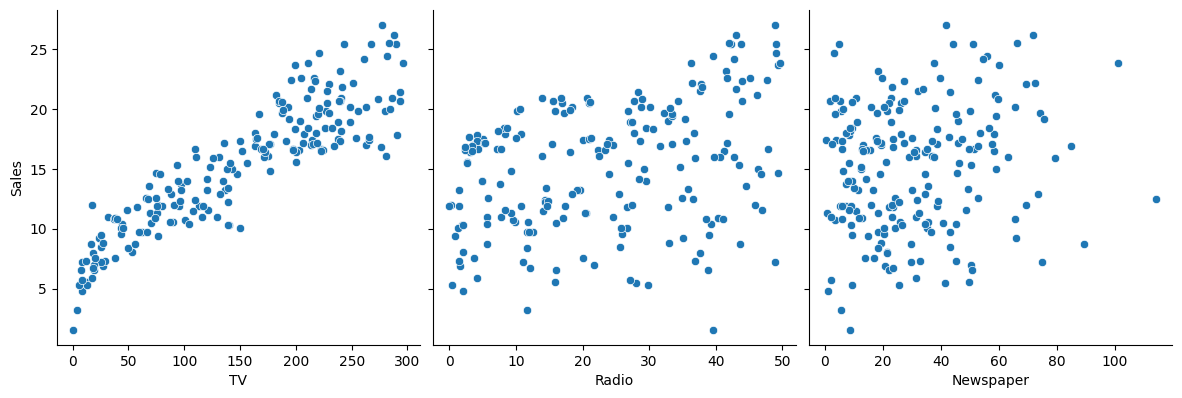

In [5]:
sns.pairplot(df, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=4, kind='scatter')
plt.show()

2. Define Features (X) and Target (Y)

In [33]:
# X includes all three features: TV, Radio, Newspaper
X = df[['TV', 'Radio', 'Newspaper']]
# Y is the target variable: Sales
Y = df['Sales']

3. Split the Data (80% Train, 20% Test)

In [34]:
# random_state ensures the split is the same every time
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

4. Model Training

In [35]:
# Initialize the Multiple Linear Regression model
model_mlr = LinearRegression()

# Train the model using the training data
model_mlr.fit(X_train, Y_train)

LinearRegression()

5. Prediction and Evaluation

In [46]:
# Make predictions on the test set
Y_pred = model_mlr.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

# Display the learned parameters (Coefficients and Intercept)
print("\n-->Model Summary: ")
print(f"Model Intercept (β₀): {model_mlr.intercept_:.3f}")
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print("\nModel Coefficients:\n", coeff_df)
# Display the evaluation metrics
print(f"\n-->Model Evaluation: ")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.4f}")



-->Model Summary: 
Model Intercept (β₀): 4.625

Model Coefficients:
            Coefficient
TV            0.054509
Radio         0.100945
Newspaper     0.004337

-->Model Evaluation: 
Mean Squared Error (MSE): 2.76
R-squared (R²): 0.9105


6. Visualization: Correlation Heatmap

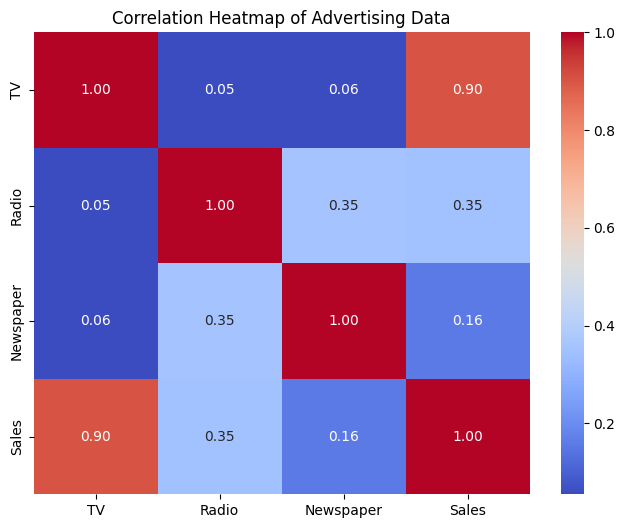

In [40]:
# Visualize correlations between all variables
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Advertising Data')
plt.savefig('correlation_heatmap.png')
plt.show() # Note: In a live environment, you would use plt.show()
plt.close()

7. Visualization: Actual vs. Predicted Plot

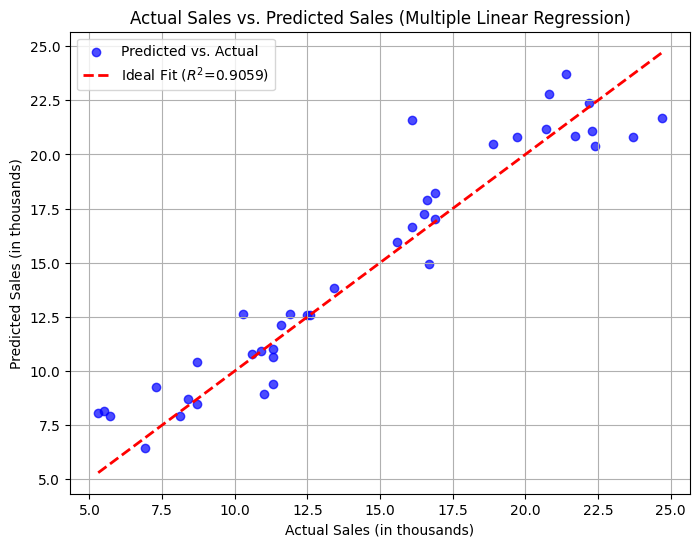

In [41]:
# Check model accuracy visually
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, color='blue', alpha=0.7, label='Predicted vs. Actual')

# Plot the ideal line (where Actual = Predicted)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()],
         'r--', lw=2, label=f'Ideal Fit ($R^2$={r2:.4f})')

plt.title('Actual Sales vs. Predicted Sales (Multiple Linear Regression)')
plt.xlabel('Actual Sales (in thousands)')
plt.ylabel('Predicted Sales (in thousands)')
plt.grid(True)
plt.legend()
plt.savefig('actual_vs_predicted_mlr.png')
plt.show() # Note: In a live environment, you would use plt.show()
plt.close()